   ## PRCP-1000-ProtugeseBank
   
## Table of Contents
1.Project Background
2.Data Cleaning
3.Exploratory Data Analysis
4.Data Visualization
5.Machine Learning: Classification
6.Machine Learning: Regression
7.Conclusion & Recommendations

## Part 1. Project Background
Nowadays, marketing expenditure in the banking industry is massive, meaning that it is essential for banks to optimize marketing strategies and improve effectiveness. Understanding customers’ need leads to more effective marketing plans, smarter product designs and greater customer satisfaction.

### Main Objective: increase the effectiveness of the bank's telemarketing campaign
This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans.

By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers.

### Load the raw data

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

There are 41,188 observations in this dataset. Each represents an existing customer that the bank reached via phone calls.

For each observation, the dataset records 16 input variables that stand for both qualitative and quantitative attributes of the customer, such as age, job, housing and personal loan status, account balance, and the number of contacts.
There is a single binary output variable that denotes “yes” or “no” revealing the outcomes of the phone calls.

In [2]:
df1 = pd.read_csv('bank-additional-full.csv',sep = ';')
df1.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df1.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Clean the dataset

#### 2.1 Deal with missing data

There is no missing value in this dataset. Nevertheless, there are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

In [5]:
# Step 1: Delete the rows which colume 'poutcome' contains 'other'
condition = df1.poutcome == 'other'
df2 = df1.drop(df1[condition].index, axis = 0, inplace = False)

In [6]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Step 2: Fill 'unknown' in job and education to 'other'
df2[['job','education']] = df2[['job','education']].replace(['unknown'],'other')

In [8]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### 2.2 Creating and transforming data

Some changes were made to the column name, units and data types for easier analysis.

In [9]:
# Drop column "contact" which is useless
df3 = df2.drop('contact', axis=1)
df3.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
# Change the unit of 'duration' from seconds to minutes
df3['duration'] = (df3['duration']/60).round(2)

In [11]:
df3.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,4.35,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,mon,2.48,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,3.77,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,2.52,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,5.12,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
# Step 4: Change 'month' from words to numbers for easier analysis
lst = [df3]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12


#### 2.3 Filtering

In [13]:
# Step 1: Drop rows that 'duration' < 5s
condition2 = (df3['duration'] < (5/60))
df4 = df3.drop(df3[condition2].index, axis = 0, inplace = False)

In [14]:
df4.head(5)

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_int
0,56,housemaid,married,basic.4y,no,no,no,may,mon,4.35,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0
1,57,services,married,high.school,unknown,no,no,may,mon,2.48,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0
2,37,services,married,high.school,no,yes,no,may,mon,3.77,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0
3,40,admin.,married,basic.6y,no,no,no,may,mon,2.52,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0
4,56,services,married,high.school,no,no,yes,may,mon,5.12,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0


In [15]:
condition3 = (df4['education'] == 'other')
df5 = df4.drop(df4[condition3].index, axis = 0, inplace = False)

In [16]:
df5.head(5)

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_int
0,56,housemaid,married,basic.4y,no,no,no,may,mon,4.35,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0
1,57,services,married,high.school,unknown,no,no,may,mon,2.48,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0
2,37,services,married,high.school,no,yes,no,may,mon,3.77,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0
3,40,admin.,married,basic.6y,no,no,no,may,mon,2.52,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0
4,56,services,married,high.school,no,no,yes,may,mon,5.12,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.0


### Part 3. Exploratory Data Analysis
To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

#### 3.1 Visualize the distribution of 'age'

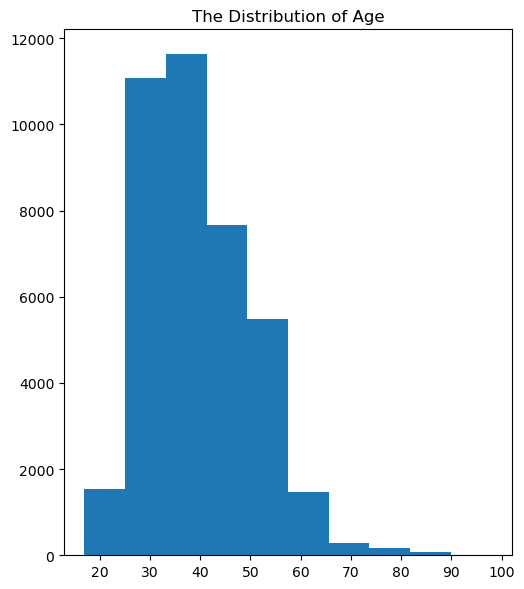

In [17]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 

ra1.hist(df5['age'])
ra1.set_title('The Distribution of Age')

plt.tight_layout() 
plt.show()

The distribution of age: In its telemarketing campaigns, clients called by the bank have an extensive age range, from 18 to 90 years old. However, a majority of customers called is in the age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.

#### 3.2 Visualize the distribution of 'duration' & 'campaign'

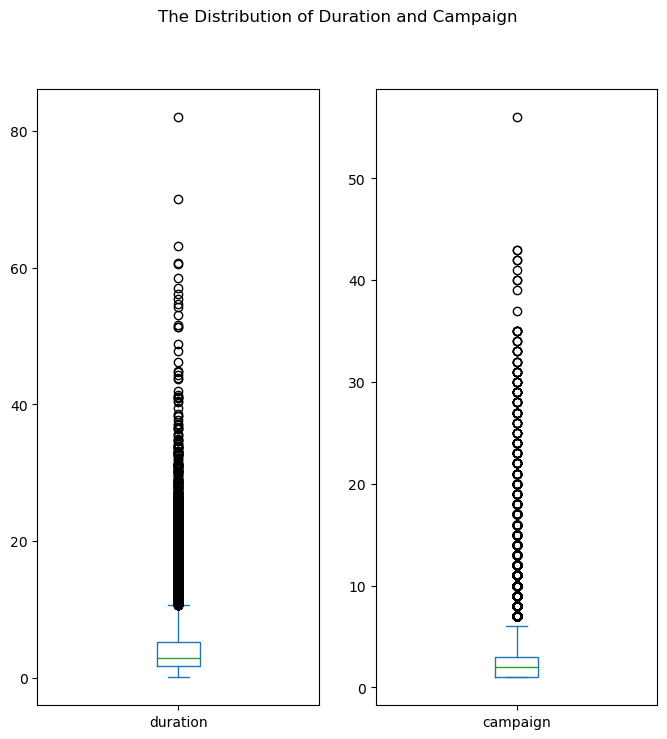

In [18]:
dist_dur_cam = df5[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

The distribution of duration: As observed from the box plot, the duration of contact has a median of 3 minutes, with an interquartile range of 1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers ranging from 10 minutes to 40 minutes, which are worth further study.

The distribution of campagin: About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact.

#### 3.3 Scatter matrix and Correlation matrix

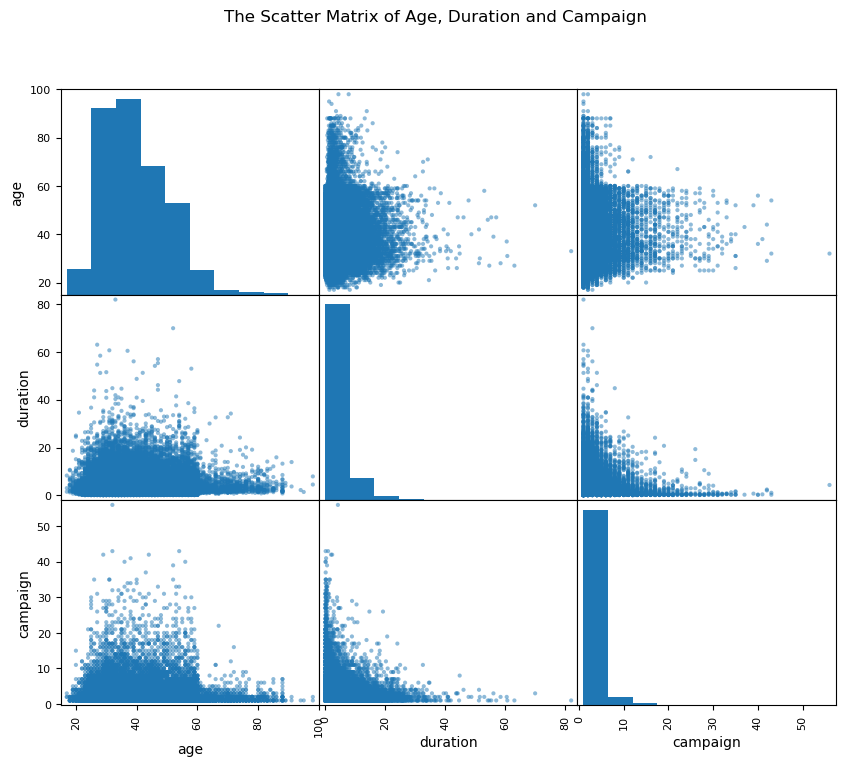

In [19]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(df5[['age','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Duration and Campaign')
plt.show()

<AxesSubplot:>

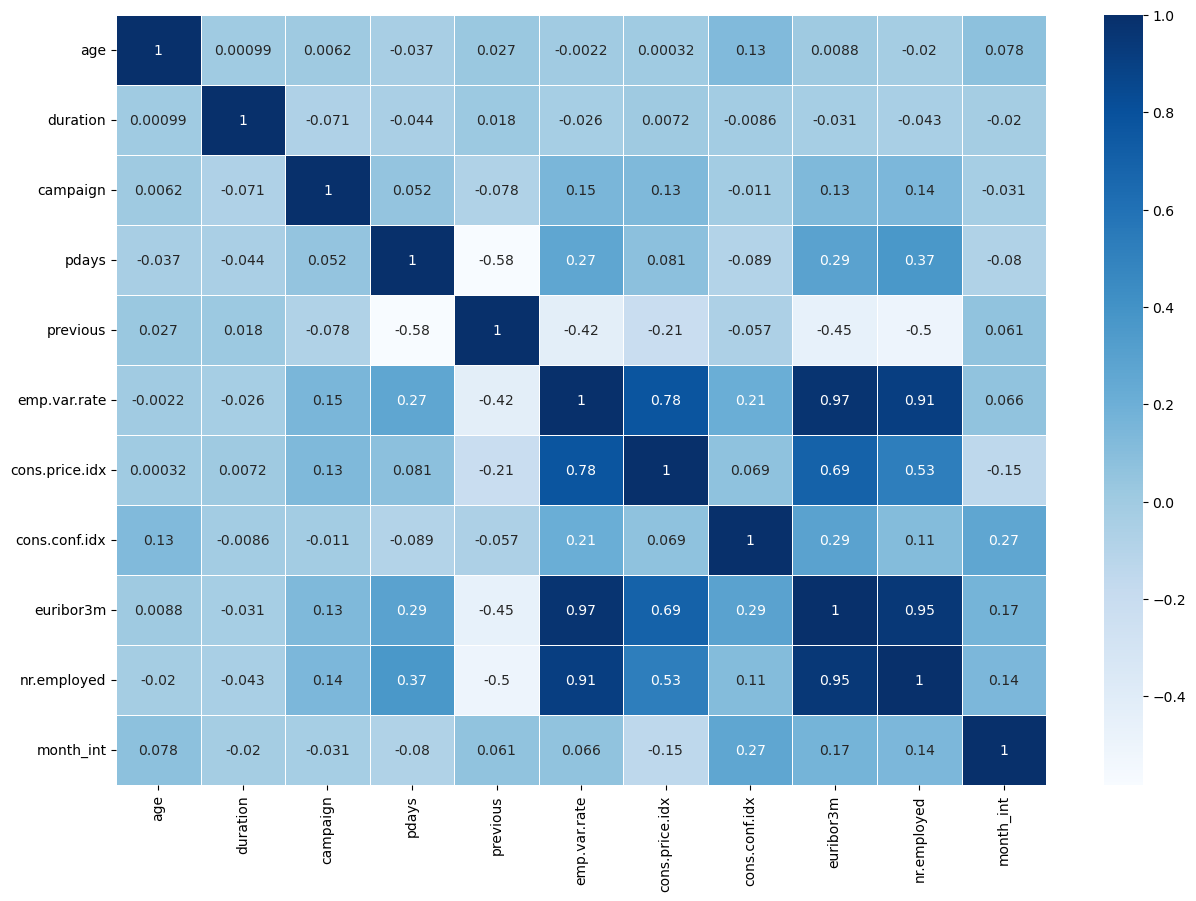

In [20]:
import seaborn as sns 
corr1 = df5.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr1,linewidths=.5,cmap= 'Blues', ax=ax,annot=True)

The scatter matrix does not reveal any clear relationship among age, duration and campaign.

To investigate more about correlation, a correlation matrix was plotted with all qualitative variables. Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”. Their influences on campaign outcome will be investigated further in the machine learning part.

### Part 5. Machine Learning: Classification

The main objective of this project is to identify the most responsive customers before the marketing campaign so that the bank will be able to efficiently reach out to them, saving time and marketing resources. To achieve this objective, classification algorithms will be employed. By analyzing customer statistics, a classification model will be built to classify all clients into two groups: "yes" to term deposits and "no" to term deposits.

#### Load the cleaned dataset

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
balance_data = df5.apply(le.fit_transform)

In [22]:
balance_data.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_int
0,39,3,1,0,0,0,0,6,1,255,...,25,0,1,8,18,16,285,8,0,2
1,40,8,1,3,1,0,0,6,1,143,...,25,0,1,8,18,16,285,8,0,2
2,20,8,1,3,0,2,0,6,1,220,...,25,0,1,8,18,16,285,8,0,2
3,23,0,1,1,0,0,0,6,1,145,...,25,0,1,8,18,16,285,8,0,2
4,39,8,1,3,0,0,2,6,1,301,...,25,0,1,8,18,16,285,8,0,2


In [23]:
X = balance_data.drop(['y'] , axis = 1)
X.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,month_int
0,39,3,1,0,0,0,0,6,1,255,0,25,0,1,8,18,16,285,8,2
1,40,8,1,3,1,0,0,6,1,143,0,25,0,1,8,18,16,285,8,2
2,20,8,1,3,0,2,0,6,1,220,0,25,0,1,8,18,16,285,8,2
3,23,0,1,1,0,0,0,6,1,145,0,25,0,1,8,18,16,285,8,2
4,39,8,1,3,0,0,2,6,1,301,0,25,0,1,8,18,16,285,8,2


In [24]:
Y = balance_data['y']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [25]:
Y.tail()

41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, dtype: int32

### Compare classification algorithms

Four different classification algorithms (Logistic Regression, K-Neighbors Classifier, Decision Tree Classifier, 
                                          and Gaussian NB) are run on the dataset and the best-performing one will be used 
                                        to build the classification model.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [27]:
# 20% of the data will be used for testing
test_size= 0.20
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
# Fit only to the training data
scalar.fit(X_train)
# Now apply the transformations to the data
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [29]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [30]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=seed , shuffle=True)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.911211 (0.003615)
KNN: 0.899981 (0.003519)
CART: 0.888688 (0.003963)
NB: 0.859060 (0.003356)


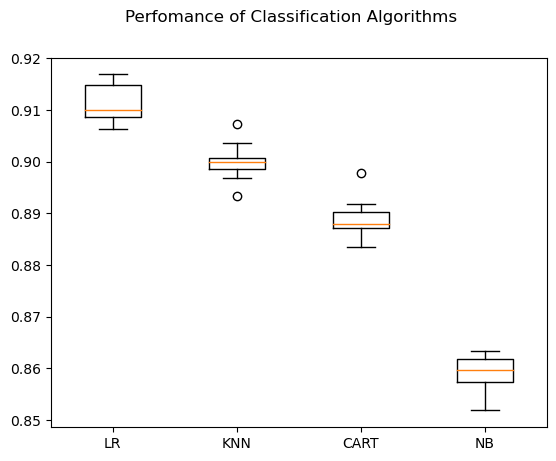

In [31]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

#### Logistic regression is the best performing model.

Among all algorithms, logistic regression achieved an accuracy of about 91%, suggesting a high level of strength of this model to classify the customer response given all the defined customer features.

### Compare classification algorithms

Four different classification algorithms (Logistic Regression, K-Neighbors Classifier, Decision Tree Classifier, and Gaussian NB) are run on the dataset and the best-performing one will be used to build the classification model.

#### Logistic Regression

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
LR = LogisticRegression()
log_reg_p = LR.fit(X_train, Y_train)

y_pred_logreg1 = log_reg_p.predict(X_test)

print(classification_report(Y_test,y_pred_logreg1))
print('accuracy score : ',accuracy_score(Y_test,y_pred_logreg1))
print(confusion_matrix(Y_test,y_pred_logreg1))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7006
           1       0.65      0.40      0.49       875

    accuracy                           0.91      7881
   macro avg       0.79      0.69      0.72      7881
weighted avg       0.90      0.91      0.90      7881

accuracy score :  0.9092754726557544
[[6816  190]
 [ 525  350]]


Accuracy score is the percentage of correct predictions out of all predictions made. The LR algorithm achieves an accuracy of 90.91%, suggesting high level of strength of this model to classify the customer response given all the defined customer features.

Classification report shows the precision, recall, F1 and support scores for the LR classification model.

* Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 93%.
   
* Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 100% correctly that they would decline the offer.
  
In general, the report shows that LR model has great predictive power to identify the customers who would not subscribe to the term deposit. However, because of the limited number of clients accepting the term deposit, there is a need for stratified sampling or rebalancing to deal with this structural weakness before we conclude whether LR algorithm can accurately classify those who are more likely to subscribe.

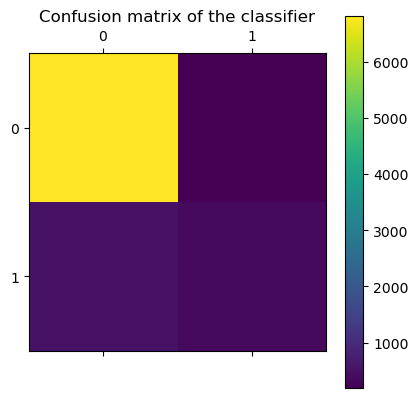

In [33]:
import pylab as pl
pl.matshow(confusion_matrix(Y_test,y_pred_logreg1))
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

#### However, the result of accuracy score can possibly yield misleading result if the data set is unbalanced, because the number of observations in different classes largely vary.

A confusion matrix gives a detailed breakdown of prediction result and error types. Each cell in the matrix represents a combination of instances of the predicted response and the actual response. In the test set, the matrix proves that the algorithm performed well because most test results (6816 True Positive predictions) locate on the diagonal cells which represent correct predictions. 526 tests (False negative) predicted the bank’s client would subscribe to the term deposit but they actually did not.

#### A problem revealed by this confusion matrix is that the dataset is highly unbalanced, with nearly all client actually decline to subscribe. 
This infers that the accuracy score is biased, and further evaluation should be carried out to determine the accuracy of logistic regression model.

#### K-Neighbors Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7) 
knn_reg_p = knn.fit(X_train, Y_train)

y_pred_knnreg1 = knn_reg_p.predict(X_test)

print(classification_report(Y_test,y_pred_knnreg1))
print('accuracy score : ',accuracy_score(Y_test,y_pred_knnreg1))
print(confusion_matrix(Y_test,y_pred_knnreg1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7006
           1       0.59      0.37      0.46       875

    accuracy                           0.90      7881
   macro avg       0.76      0.67      0.70      7881
weighted avg       0.89      0.90      0.89      7881

accuracy score :  0.9015353381550565
[[6780  226]
 [ 550  325]]


#### Create Decision Tree classifer object

In [35]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_reg_p = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred_clfreg1 = clf_reg_p.predict(X_test)

print(classification_report(Y_test,y_pred_clfreg1))
print('accuracy score : ',accuracy_score(Y_test,y_pred_clfreg1))
print(confusion_matrix(Y_test,y_pred_clfreg1))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7006
           1       0.51      0.52      0.52       875

    accuracy                           0.89      7881
   macro avg       0.73      0.73      0.73      7881
weighted avg       0.89      0.89      0.89      7881

accuracy score :  0.8916381169902297
[[6571  435]
 [ 419  456]]


#### Gaussian NB

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_reg_p = gnb.fit(X_train, Y_train)

y_pred_gnbreg1 = gnb_reg_p.predict(X_test)

print(classification_report(Y_test,y_pred_gnbreg1))
print('accuracy score : ',accuracy_score(Y_test,y_pred_gnbreg1))
print(confusion_matrix(Y_test,y_pred_gnbreg1))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7006
           1       0.39      0.59      0.47       875

    accuracy                           0.85      7881
   macro avg       0.67      0.73      0.69      7881
weighted avg       0.88      0.85      0.86      7881

accuracy score :  0.8509072452734424
[[6194  812]
 [ 363  512]]


### Compare regression algorithms

Six different regression algorithms (Linear Regression, Lasso, Ridge, ElasticNet, K Neighbors and Decision Tree) are run on the dataset and the best-performing one will be used to build the estimation model.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [38]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

In [39]:
results_e2 = []
names_e2 = []

for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2.append(cv_results)
    names_e2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.064451 (0.001936)
LASSO: -0.099054 (0.004902)
RIDGE: -0.064450 (0.001936)
EN: -0.099054 (0.004902)
KNN: -0.072235 (0.002756)
CART: -0.112263 (0.005145)


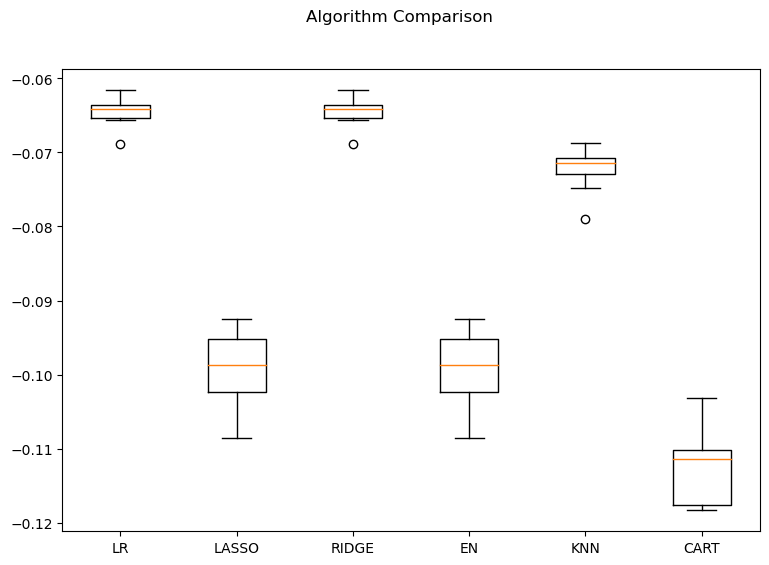

In [40]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2)
plt.show()

### Stardardize Data

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))

In [42]:
results_e2_normalized = []
names_e2_normalized = []

for name, model in pipelines:
    # define how to split off validation data
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results_e2_normalized.append(cv_results)
    names_e2_normalized.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.064451 (0.001936)
ScaledLASSO: -0.099054 (0.004902)
ScaledRIDGE: -0.064450 (0.001936)
ScaledEN: -0.099054 (0.004902)
ScaledKNN: -0.072239 (0.002787)
ScaledCART: -0.111248 (0.004254)


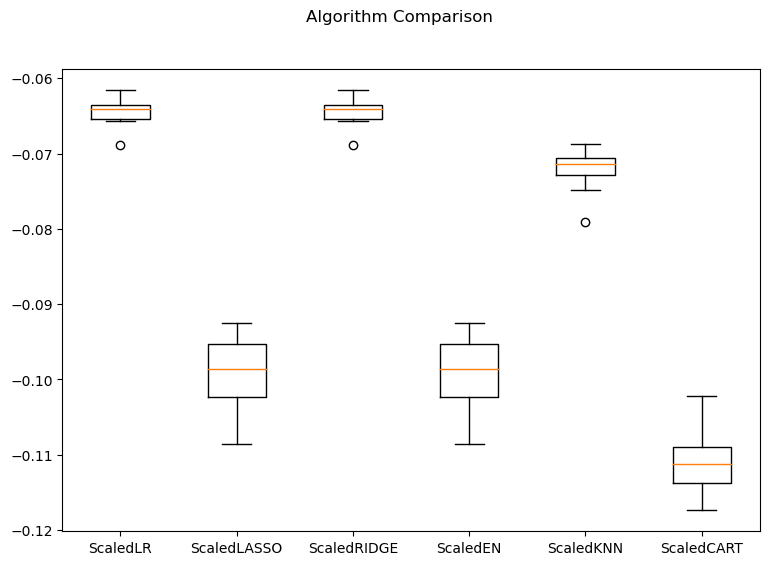

In [43]:
# Plot results
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
plt.boxplot(results_e2_normalized)

fig.suptitle('Algorithm Comparison')
ax.set_xticklabels(names_e2_normalized)
plt.show()

#### Test the RIDGE model on the test set

In [44]:
ridge = Ridge()
rdg_reg_q = ridge.fit(X_train, Y_train)
y_pred_rdgreg = rdg_reg_q.predict(X_test)

from sklearn.metrics import mean_squared_error
print('The MSE is', mean_squared_error(Y_test, y_pred_rdgreg))

The MSE is 0.06587193659045552


According to the previous analysis, observations on duration are extremely varied from 0.1 to 81.97 minutes in this dataset. Therefore, a 0.0661 MSE testifies that ridge regression is a sound model in predicting the target variable and suggest that the bank can roughly estimate the duration of campaign calls of each client using their customer profiles such as age, job, and loans.

In [45]:
LR1 = LinearRegression()
log_reg_q = LR1.fit(X_train, Y_train)

y_pred_linreg = log_reg_q.predict(X_test)

print('The MSE is', mean_squared_error(Y_test, y_pred_linreg))

The MSE is 0.06587202638434184


In [46]:
las = Lasso()
las_reg_q = las.fit(X_train, Y_train)
y_pred_lasreg = las_reg_q.predict(X_test)

print('The MSE is', mean_squared_error(Y_test, y_pred_lasreg))

The MSE is 0.09869982868020581


In [47]:
eln = ElasticNet(alpha=1.0, l1_ratio=0.5)
eln_reg_q = eln.fit(X_train, Y_train)

y_pred_elnreg = eln_reg_q.predict(X_test)

print('The MSE is', mean_squared_error(Y_test, y_pred_elnreg))

The MSE is 0.09869982868020581


In [48]:
kne = KNeighborsRegressor(n_neighbors=3)
kne_reg_q = kne.fit(X_train, Y_train)

y_pred_knereg = kne_reg_q.predict(X_test)

print('The MSE is', mean_squared_error(Y_test, y_pred_knereg))

The MSE is 0.07937514979768502


In [49]:
dtr = DecisionTreeRegressor()
dtr_reg_q = dtr.fit(X_train, Y_train)

y_pred_dtrreg = dtr_reg_q.predict(X_test)

print('The MSE is', mean_squared_error(Y_test, y_pred_dtrreg))

The MSE is 0.10671234614896587


## Part 6. Conclusion & Recommendations

The main objective of this project is to increase the effectiveness of the bank's telemarketing campaign, which was successfully met through data analysis, visualization and analytical model building. A target customer profile was established while classification and regression models were built to predict customers' response to the term deposit campaign.

### Conclusion:
According to previous analysis, a target customer profile can be established. The most responsive customers possess these features:

* Feature 1: age < 30 or age > 60
* Feature 2: students or retired people
* Feature 3: a balance of more than 5000 euros

By applying logistic and ridge regression algorithms, classification and estimation model were successfully built. With these two models, the bank will be able to predict a customer's response to its telemarketing campaign before calling this customer. In this way, the bank can allocate more marketing efforts to the clients who are classified as highly likely to accept term deposits, and call less to those who are unlikely to make term deposits.

In addition, predicting duration before calling and adjusting marketing plan benefit both the bank and its clients. On the one hand, it will increase the efficiency of the bank’s telemarketing campaign, saving time and efforts. On the other hand, it prevents some clients from receiving undesirable advertisements, raising customer satisfaction. With the aid of logistic and ridge regression models, the bank can enter a virtuous cycle of effective marketing, more investments and happier customers.

### Recommendations

#### 1. More appropriate timing

When implementing a marketing strategy, external factors, such as the time of calling, should also be carefully considered. The previous analysis points out that March, September, October and December had the highest success rates. Nevertheless, more data should be collected and analyzed to make sure that this seasonal effect is constant over time. If the trend has the potential to continue in the future, the bank should consider initiating its telemarketing campaign in fall and spring.

#### 2. Smarter marketing design

By targeting the right customers, the bank will have more and more positive responses, and the classification algorithms would ultimately eliminate the imbalance in the original dataset. Hence, more accurate information will be presented to the bank for improving the subscriptions. Meanwhile, to increase the likelihood of subscription, the bank should re-evaluate the content and design of its current campaign, making it more appealing to its target customers.

#### 3. Better services provision

With a more granular understanding of its customer base, the bank has the ability to provide better banking services. For example, marital status and occupation reveal a customer's life stage while loan status indicates his/her overall risk profile. With this information, the bank can estimate when a customer might need to make an investment. In this way, the bank can better satisfy its customer demand by providing banking services for the right customer at the right time.

